# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [49]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:

# Scrape the website
html = browser.html

# Create a Beautiful Soup object
soup = BeautifulSoup(html, 'html.parser')

In [6]:
# Find the table
table = soup.find('table', {'class': 'table'})

In [59]:
# Store the table
mars_table_scrapping = []
rows = table.find_all('tr')

In [19]:
# Extract the table headers
headers = [th.text.strip() for th in table.find('tr').find_all('th')]

for row in table.find_all('tr')[1:]:
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    mars_table_scrapping.append([col for col in cols])

mars_table_scrapping

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [22]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(mars_table_scrapping, columns=headers)
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
3729,1889,2018-02-23,1973,133,5,-78.0,730.0
3730,1892,2018-02-24,1974,134,5,-77.0,729.0
3731,1894,2018-02-25,1975,134,5,-76.0,729.0
3732,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [25]:
# Examine data type of each column
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [27]:
# Change data types for data analysis
# Examine and cast data types as necessary
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)
df['month'] = (df['month']).astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)


In [29]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [30]:
df.columns


Index(['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'], dtype='object')

In [42]:
# 1. How many months are there on Mars?
num_months = df['month'].value_counts()
num_months

month
4     388
3     384
2     356
1     348
12    332
5     298
6     294
7     284
8     282
11    276
9     268
10    224
Name: count, dtype: int64

In [44]:
# 2. How many Martian days' worth of data are there?
num_martian_days = len(df)
print(f"There are {num_martian_days} Martian days worth of data in the scraped dataset.")

There are 3734 Martian days worth of data in the scraped dataset.


In [48]:
# 3. What is the average low temperature by month?
monthly_min_temp = df.groupby('month')['min_temp'].mean()
coldest_month = monthly_min_temp.idxmin()
warmest_month = monthly_min_temp.idxmax()
print(f"The coldest month on Mars is {coldest_month} with an average minimum temperature of {monthly_min_temp[coldest_month]:.1f}°C.")
print(f"The warmest month on Mars is {warmest_month} with an average minimum temperature of {monthly_min_temp[warmest_month]:.1f}°C.")
print(monthly_min_temp)

The coldest month on Mars is 3 with an average minimum temperature of -83.3°C.
The warmest month on Mars is 8 with an average minimum temperature of -68.4°C.
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


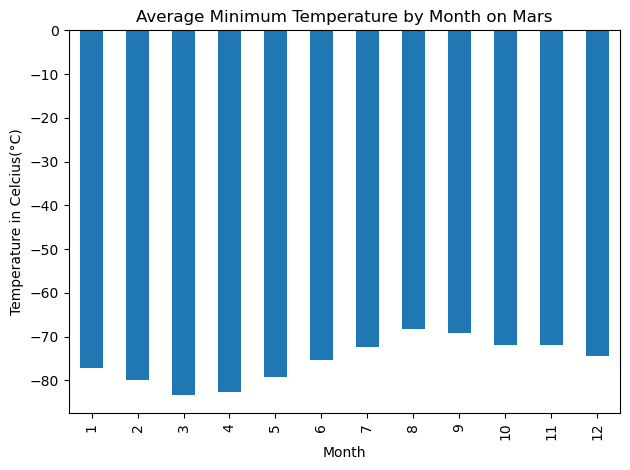

In [50]:
# Plot the average temperature by month
monthly_min_temp.plot(kind='bar')
plt.title("Average Minimum Temperature by Month on Mars")
plt.xlabel("Month")
plt.ylabel("Temperature in Celcius(°C)")
plt.tight_layout()
plt.show()

The coldest month on Mars is 3 with an average minimum temperature of -83.3°C.
The warmest month on Mars is 8 with an average minimum temperature of -68.4°C.


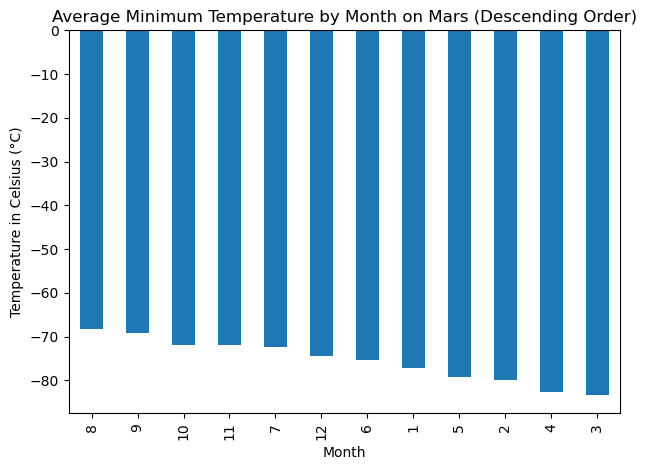

In [52]:
# Identify the coldest and hottest months in Curiosity's location
monthly_min_temp_sorted = monthly_min_temp.sort_values(ascending=False)

print(f"The coldest month on Mars is {coldest_month} with an average minimum temperature of {monthly_min_temp[coldest_month]:.1f}°C.")
print(f"The warmest month on Mars is {warmest_month} with an average minimum temperature of {monthly_min_temp[warmest_month]:.1f}°C.")

monthly_min_temp_sorted.plot(kind='bar')
plt.title("Average Minimum Temperature by Month on Mars (Descending Order)")
plt.xlabel("Month")
plt.ylabel("Temperature in Celsius (°C)")
plt.tight_layout()
plt.show()

In [53]:
# 4. Average pressure by Martian month
monthly_pressure = df.groupby('month')['pressure'].mean()
lowest_pressure_month = monthly_pressure.idxmin()
highest_pressure_month = monthly_pressure.idxmax()
print(f"The month with the lowest atmospheric pressure on Mars is {lowest_pressure_month} with an average pressure of {monthly_pressure[lowest_pressure_month]:.1f} Pa.")
print(monthly_pressure)

The month with the lowest atmospheric pressure on Mars is 6 with an average pressure of 745.1 Pa.
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


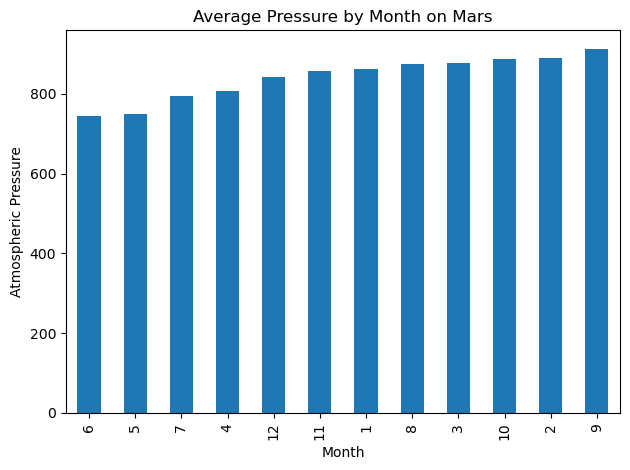

In [56]:
# Plot the average pressure by month
monthly_pressure_sorted = monthly_pressure.sort_values(ascending=True)
monthly_pressure_sorted.plot(kind='bar')
plt.title("Average Pressure by Month on Mars")
plt.xlabel("Month")
plt.ylabel("Atmospheric Pressure")
plt.tight_layout()
plt.show()

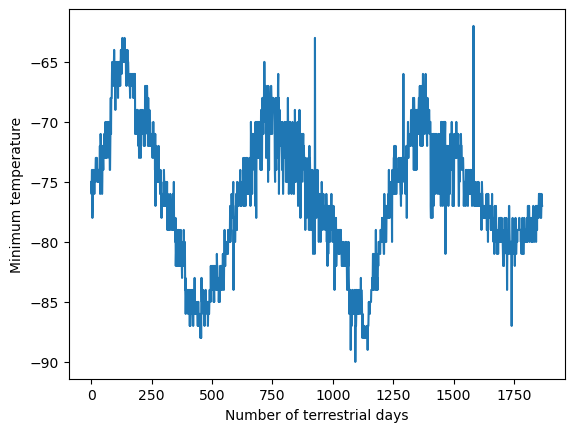

In [19]:
# 5. How many terrestrial (earth) days are there in a Martian year?


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [57]:
# Write the data to a CSV
df.to_csv('filename.csv', index=False)

In [58]:
browser.quit()